In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc

from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [2]:
#king county boundaries
maxLat = 47.7763
minLat = 47.1878
maxLon = -121.0941
minLon = -122.5346

In [3]:
df = pd.read_csv("Downloads/camera_results.csv")

In [4]:
record_cols = ['Begin_Time','Species_Name','Common_Name','Actual_Lat','Actual_Lon']
df.columns = record_cols
df = df[(df['Actual_Lat']>minLat)&(df['Actual_Lat']<maxLat)&(df['Actual_Lon']>minLon)&(df['Actual_Lon']<maxLon)]
df['Begin_Time']=pd.to_datetime(df.Begin_Time).copy()
df['Month']=df.Begin_Time.dt.month

In [5]:
summer = df[(df.Month>=6)&(df.Month<=8)] 
fall = df[(df.Month>=9)&(df.Month<=11)]
winter = df[(df.Month==12)|((df.Month==1)|(df.Month==2))]
spring = df[(df.Month>=3)&(df.Month<=5)]

In [6]:
#coyote
coyo_sum = summer[summer.Common_Name=='Coyote']
coyo_fall = fall[fall.Common_Name=='Coyote']
coyo_winter = winter[winter.Common_Name=='Coyote']
coyo_spring = spring[spring.Common_Name=='Coyote']

In [7]:
#black bear
b_sum = summer[summer.Common_Name=='American Black Bear']
b_fall = fall[fall.Common_Name=='American Black Bear']
b_winter = winter[winter.Common_Name=='American Black Bear']
b_spring = spring[spring.Common_Name=='American Black Bear']

In [8]:
#raccoon
r_sum = summer[summer.Common_Name=='Northern Raccoon']
r_fall = fall[fall.Common_Name=='Northern Raccoon']
r_winter = winter[winter.Common_Name=='Northern Raccoon']
r_spring = spring[spring.Common_Name=='Northen Raccoon']

In [9]:
#coyote, American Black Bear,Northern Raccoon
cbr_summer = summer[(summer.Common_Name=='Coyote')|(summer.Common_Name=='American Black Bear')|(summer.Common_Name=='Northern Raccoon')]
cbr_fall = fall[(fall.Common_Name=='Coyote')|(fall.Common_Name=='American Black Bear')|(fall.Common_Name=='Northern Raccoon')]
cbr_winter = winter[(winter.Common_Name=='Coyote')|(winter.Common_Name=='American Black Bear')|(winter.Common_Name =='Northern Raccoon')]
cbr_spring = spring[(spring.Common_Name=='Coyote')|(spring.Common_Name=='American Black Bear')|(spring.Common_Name=='Northern Raccoon')]

In [10]:
summer = summer.drop(['Begin_Time','Species_Name','Common_Name','Month'],axis=1)
fall = fall.drop(['Begin_Time','Species_Name','Common_Name','Month'],axis=1)
winter = winter.drop(['Begin_Time','Species_Name','Common_Name','Month'],axis=1)
spring = spring.drop(['Begin_Time','Species_Name','Common_Name','Month'],axis=1)

In [11]:
coyo_sum = coyo_sum.drop(['Begin_Time','Species_Name','Common_Name','Month'],axis=1)
coyo_fall = coyo_fall.drop(['Begin_Time','Species_Name','Common_Name','Month'],axis=1)
coyo_winter = coyo_winter.drop(['Begin_Time','Species_Name','Common_Name','Month'],axis=1)
coyo_spring = coyo_spring.drop(['Begin_Time','Species_Name','Common_Name','Month'],axis=1)

In [12]:
b_sum = b_sum.drop(['Begin_Time','Species_Name','Common_Name','Month'],axis=1)
b_fall = b_fall.drop(['Begin_Time','Species_Name','Common_Name','Month'],axis=1)
b_winter = b_winter.drop(['Begin_Time','Species_Name','Common_Name','Month'],axis=1)
b_spring = b_spring.drop(['Begin_Time','Species_Name','Common_Name','Month'],axis=1)

In [13]:
r_sum = r_sum.drop(['Begin_Time','Species_Name','Common_Name','Month'],axis=1)
r_fall = r_fall.drop(['Begin_Time','Species_Name','Common_Name','Month'],axis=1)
r_winter = r_winter.drop(['Begin_Time','Species_Name','Common_Name','Month'],axis=1)
r_spring = r_spring.drop(['Begin_Time','Species_Name','Common_Name','Month'],axis=1)

In [14]:
cbr_summer = cbr_summer.drop(['Begin_Time','Species_Name','Common_Name','Month'],axis=1)
cbr_fall = cbr_fall.drop(['Begin_Time','Species_Name','Common_Name','Month'],axis=1)
cbr_winter = cbr_winter.drop(['Begin_Time','Species_Name','Common_Name','Month'],axis=1)
cbr_spring = cbr_spring.drop(['Begin_Time','Species_Name','Common_Name','Month'],axis=1)

In [15]:
summer_scaled=StandardScaler().fit_transform(summer)
fall_scaled=StandardScaler().fit_transform(fall)
winter_scaled=StandardScaler().fit_transform(winter)
spring_scaled=StandardScaler().fit_transform(spring)

In [16]:
#coyote
coyo_summer_scaled=StandardScaler().fit_transform(coyo_sum)
coyo_fall_scaled=StandardScaler().fit_transform(coyo_fall)
coyo_winter_scaled=StandardScaler().fit_transform(coyo_winter)
coyo_spring_scaled=StandardScaler().fit_transform(coyo_spring)

In [17]:
#black bear
b_summer_scaled=StandardScaler().fit_transform(b_sum) 
b_fall_scaled=StandardScaler().fit_transform(b_fall)
#no data point in winter
b_spring_scaled=StandardScaler().fit_transform(b_spring)

In [18]:
#raccoon
r_summer_scaled=StandardScaler().fit_transform(r_sum)
r_fall_scaled=StandardScaler().fit_transform(r_fall)
r_winter_scaled=StandardScaler().fit_transform(r_winter)
#no data point in spring

In [19]:
#cbr
cbr_summer_scaled=StandardScaler().fit_transform(cbr_summer)
cbr_fall_scaled=StandardScaler().fit_transform(cbr_fall)
cbr_winter_scaled=StandardScaler().fit_transform(cbr_winter)
cbr_spring_scaled=StandardScaler().fit_transform(cbr_spring)

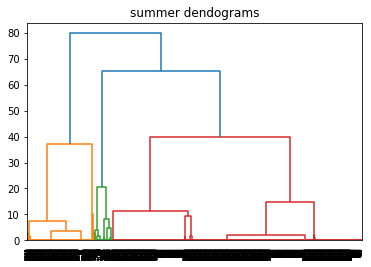

In [20]:
plt.title("summer dendograms")
dend = shc.dendrogram(shc.linkage(summer_scaled,method='ward'))

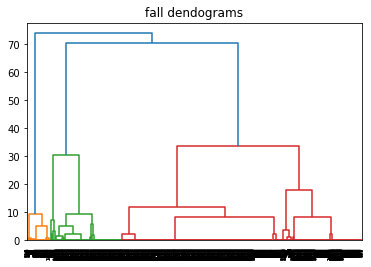

In [21]:
plt.title("fall dendograms")
dend = shc.dendrogram(shc.linkage(fall_scaled,method='ward'))

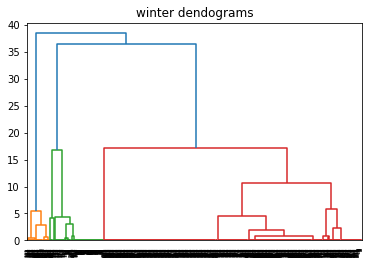

In [22]:
plt.title("winter dendograms")
dend = shc.dendrogram(shc.linkage(winter_scaled,method='ward'))

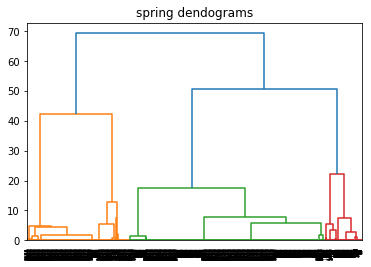

In [23]:
plt.title("spring dendograms")
dend = shc.dendrogram(shc.linkage(spring_scaled,method='ward'))

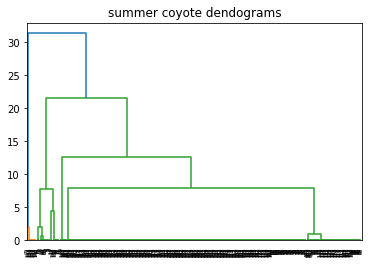

In [24]:
plt.title("summer coyote dendograms")
dend = shc.dendrogram(shc.linkage(coyo_summer_scaled,method='ward'))

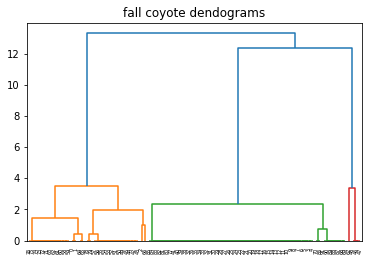

In [25]:
plt.title("fall coyote dendograms")
dend = shc.dendrogram(shc.linkage(coyo_fall_scaled,method='ward'))

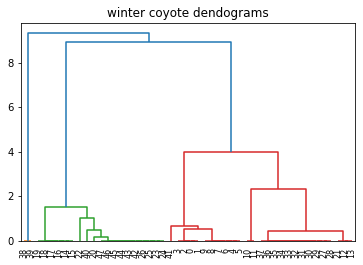

In [26]:
plt.title("winter coyote dendograms")
dend = shc.dendrogram(shc.linkage(coyo_winter_scaled,method='ward'))

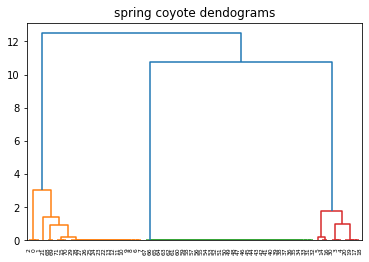

In [27]:
plt.title("spring coyote dendograms")
dend = shc.dendrogram(shc.linkage(coyo_spring_scaled,method='ward'))

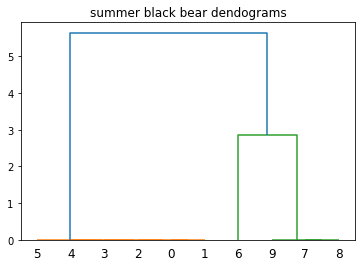

In [28]:
plt.title("summer black bear dendograms")
dend = shc.dendrogram(shc.linkage(b_summer_scaled,method='ward'))

<ipython-input-29-4a6820fcc05b>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dend = shc.dendrogram(shc.linkage(b_fall_scaled,method='ward'))
/Users/yinyingliang/opt/anaconda3/envs/geo_env/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:2830: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


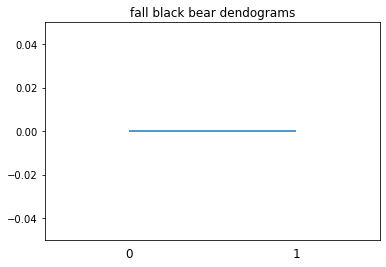

In [29]:
plt.title("fall black bear dendograms")
dend = shc.dendrogram(shc.linkage(b_fall_scaled,method='ward'))

<ipython-input-30-dcc6d42ee211>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dend = shc.dendrogram(shc.linkage(b_spring_scaled,method='ward'))


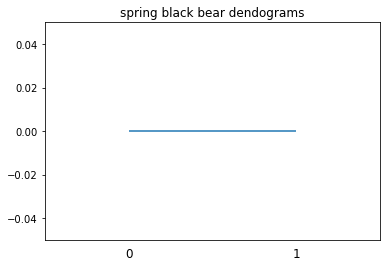

In [30]:
plt.title("spring black bear dendograms")
dend = shc.dendrogram(shc.linkage(b_spring_scaled,method='ward'))

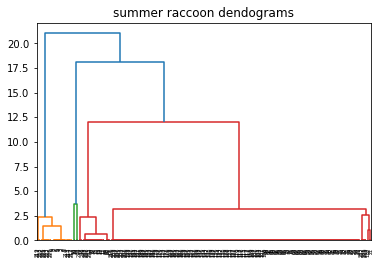

In [31]:
plt.title("summer raccoon dendograms")
dend = shc.dendrogram(shc.linkage(r_summer_scaled,method='ward'))

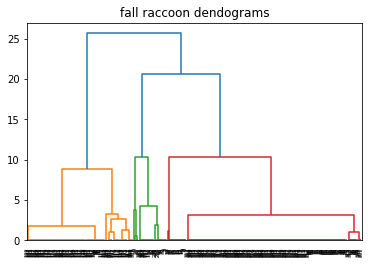

In [32]:
plt.title("fall raccoon dendograms")
dend = shc.dendrogram(shc.linkage(r_fall_scaled,method='ward'))

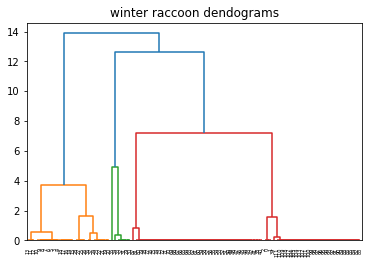

In [33]:
plt.title("winter raccoon dendograms")
dend = shc.dendrogram(shc.linkage(r_winter_scaled,method='ward'))

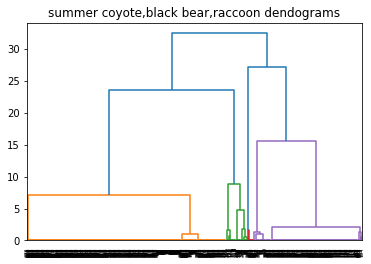

In [34]:
plt.title("summer coyote,black bear,raccoon dendograms")
dend = shc.dendrogram(shc.linkage(cbr_summer_scaled,method='ward'))

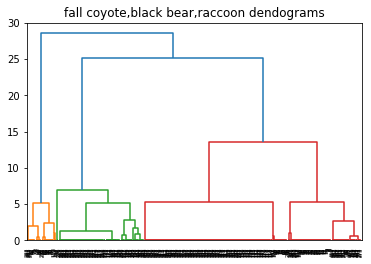

In [35]:
plt.title("fall coyote,black bear,raccoon dendograms")
dend = shc.dendrogram(shc.linkage(cbr_fall_scaled,method='ward'))

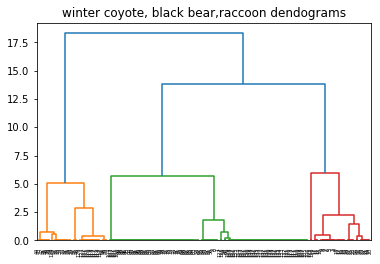

In [36]:
plt.title("winter coyote, black bear,raccoon dendograms")
dend = shc.dendrogram(shc.linkage(cbr_winter_scaled,method='ward'))

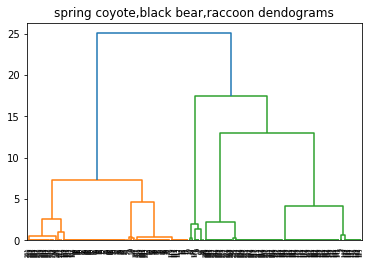

In [37]:
plt.title("spring coyote,black bear,raccoon dendograms")
dend = shc.dendrogram(shc.linkage(cbr_spring_scaled,method='ward'))

In [ ]:
#cluster numbers are determined using the dendrogram, can be adjusted based on the graph

In [38]:
summer_cluster = AgglomerativeClustering(n_clusters =5, affinity='euclidean',linkage='ward')
summer_cluster.fit_predict(summer_scaled)

array([0, 0, 0, ..., 3, 3, 3])

In [39]:
fall_cluster = AgglomerativeClustering(n_clusters =5, affinity='euclidean',linkage='ward')
fall_cluster.fit_predict(fall_scaled)

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
winter_cluster = AgglomerativeClustering(n_clusters =6, affinity='euclidean',linkage='ward')
winter_cluster.fit_predict(winter_scaled)

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [41]:
spring_cluster = AgglomerativeClustering(n_clusters =4, affinity='euclidean',linkage='ward')
spring_cluster.fit_predict(spring_scaled)

array([0, 0, 0, ..., 3, 3, 3])

In [42]:
coyo_summer_cluster = AgglomerativeClustering(n_clusters = 4, affinity='euclidean',linkage='ward')
coyo_summer_cluster.fit_predict(coyo_summer_scaled)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [43]:
coyo_fall_cluster = AgglomerativeClustering(n_clusters =3, affinity='euclidean',linkage='ward')
coyo_fall_cluster.fit_predict(coyo_fall_scaled)

array([0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

In [44]:
coyo_winter_cluster = AgglomerativeClustering(n_clusters =4, affinity='euclidean',linkage='ward')
coyo_winter_cluster.fit_predict(coyo_winter_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 2, 1, 2, 2,
       2, 2, 2, 2])

In [45]:
coyo_spring_cluster = AgglomerativeClustering(n_clusters =3, affinity='euclidean',linkage='ward')
coyo_spring_cluster.fit_predict(coyo_spring_scaled)

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0])

In [46]:
b_summer_cluster = AgglomerativeClustering(n_clusters =3, affinity='euclidean',linkage='ward')
b_summer_cluster.fit_predict(b_summer_scaled)

array([1, 1, 1, 1, 1, 1, 2, 0, 0, 0])

In [47]:
b_fall_cluster = AgglomerativeClustering(n_clusters =1, affinity='euclidean',linkage='ward')
b_fall_cluster.fit_predict(b_fall_scaled)

/Users/yinyingliang/opt/anaconda3/envs/geo_env/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([0, 0])

In [48]:
b_spring_cluster = AgglomerativeClustering(n_clusters =1, affinity='euclidean',linkage='ward')
b_spring_cluster.fit_predict(b_spring_scaled)

/Users/yinyingliang/opt/anaconda3/envs/geo_env/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([0, 0])

In [49]:
r_summer_cluster = AgglomerativeClustering(n_clusters =4, affinity='euclidean',linkage='ward')
r_summer_cluster.fit_predict(r_summer_scaled)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1])

In [50]:
r_fall_cluster = AgglomerativeClustering(n_clusters =6, affinity='euclidean',linkage='ward')
r_fall_cluster.fit_predict(r_fall_scaled)

array([1, 0, 0, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 0, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 2, 2, 2, 0, 4, 4, 4, 4, 4, 4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [51]:
r_winter_cluster = AgglomerativeClustering(n_clusters =4, affinity='euclidean',linkage='ward')
r_winter_cluster.fit_predict(r_winter_scaled)

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [62]:
cbr_summer_cluster = AgglomerativeClustering(n_clusters =4, affinity='euclidean',linkage='ward')
cbr_summer_cluster.fit_predict(cbr_summer_scaled)
print(len(cbr_summer_cluster.labels_))

692


In [53]:
cbr_fall_cluster = AgglomerativeClustering(n_clusters =4, affinity='euclidean',linkage='ward')
cbr_fall_cluster.fit_predict(cbr_fall_scaled)

array([3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 2, 2, 2, 2,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 3, 3, 2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,

In [54]:
cbr_winter_cluster = AgglomerativeClustering(n_clusters =3, affinity='euclidean',linkage='ward')
cbr_winter_cluster.fit_predict(cbr_winter_scaled)

array([2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [55]:
cbr_spring_cluster = AgglomerativeClustering(n_clusters =4, affinity='euclidean',linkage='ward')
cbr_spring_cluster.fit_predict(cbr_spring_scaled)

array([0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Text(0.5, 1.0, 'Winter')

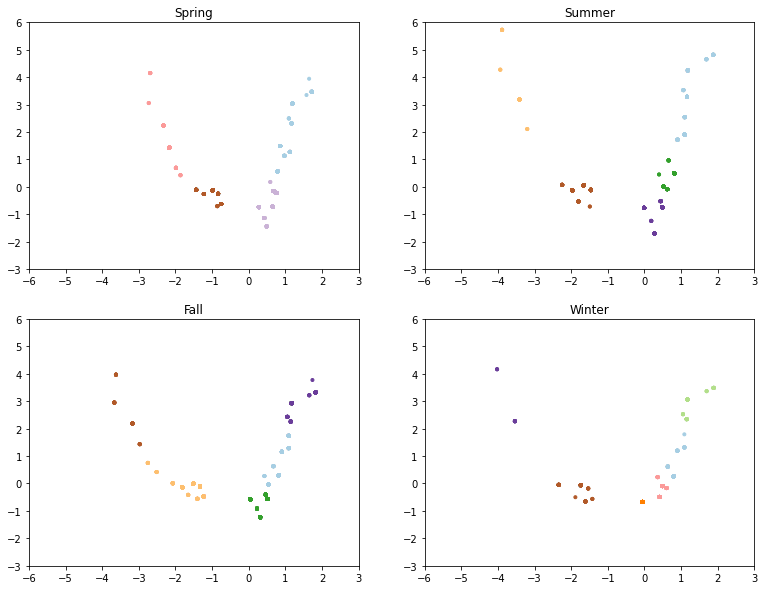

In [56]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-6,3)
c_ylim=(-3,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(spring_scaled[:,0],spring_scaled[:,1],c=spring_cluster.labels_,cmap='Paired',marker='.')
axs[0,0].set_title('Spring')
axs[0,1].scatter(summer_scaled[:,0],summer_scaled[:,1],c=summer_cluster.labels_,cmap='Paired',marker='.')
axs[0,1].set_title('Summer')
axs[1,0].scatter(fall_scaled[:,0],fall_scaled[:,1],c=fall_cluster.labels_,cmap='Paired',marker='.')
axs[1,0].set_title('Fall')
axs[1,1].scatter(winter_scaled[:,0],winter_scaled[:,1],c=winter_cluster.labels_,cmap='Paired',marker='.')
axs[1,1].set_title('Winter')


Text(0.5, 1.0, 'coyote Winter')

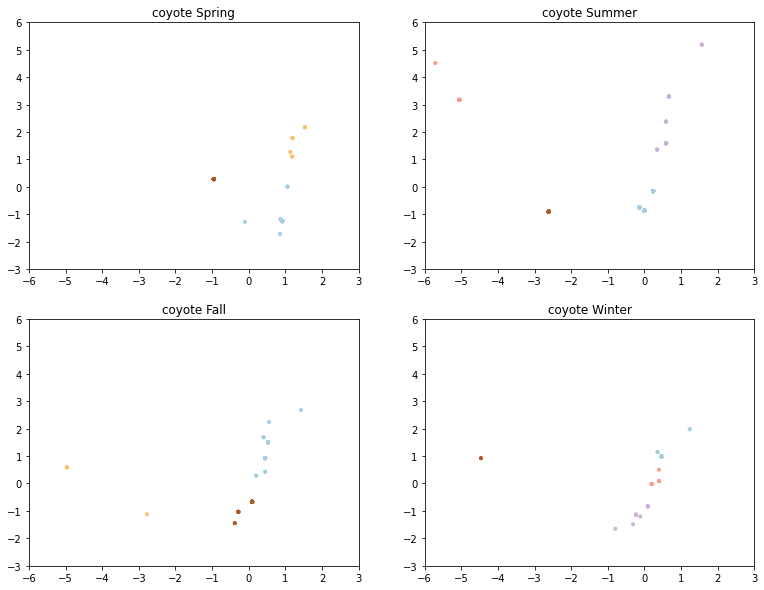

In [57]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-6,3)
c_ylim=(-3,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(coyo_spring_scaled[:,0],coyo_spring_scaled[:,1],c=coyo_spring_cluster.labels_,cmap='Paired',marker='.')
axs[0,0].set_title('coyote Spring')
axs[0,1].scatter(coyo_summer_scaled[:,0],coyo_summer_scaled[:,1],c=coyo_summer_cluster.labels_,cmap='Paired',marker='.')
axs[0,1].set_title('coyote Summer')
axs[1,0].scatter(coyo_fall_scaled[:,0],coyo_fall_scaled[:,1],c=coyo_fall_cluster.labels_,cmap='Paired',marker='.')
axs[1,0].set_title('coyote Fall')
axs[1,1].scatter(coyo_winter_scaled[:,0],coyo_winter_scaled[:,1],c=coyo_winter_cluster.labels_,cmap='Paired',marker='.')
axs[1,1].set_title('coyote Winter')

Text(0.5, 1.0, 'black bear Winter')

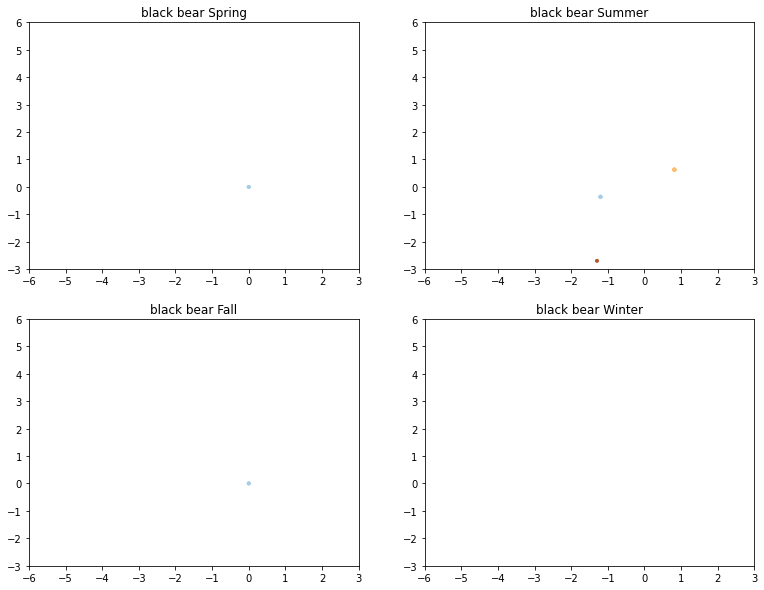

In [58]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-6,3)
c_ylim=(-3,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(b_spring_scaled[:,0],b_spring_scaled[:,1],c=b_spring_cluster.labels_,cmap='Paired',marker='.')
axs[0,0].set_title('black bear Spring')
axs[0,1].scatter(b_summer_scaled[:,0],b_summer_scaled[:,1],c=b_summer_cluster.labels_,cmap='Paired',marker='.')
axs[0,1].set_title('black bear Summer')
axs[1,0].scatter(b_fall_scaled[:,0],b_fall_scaled[:,1],c=b_fall_cluster.labels_,cmap='Paired',marker='.')
axs[1,0].set_title('black bear Fall')
axs[1,1].set_title('black bear Winter')


Text(0.5, 1.0, 'raccoon Winter')

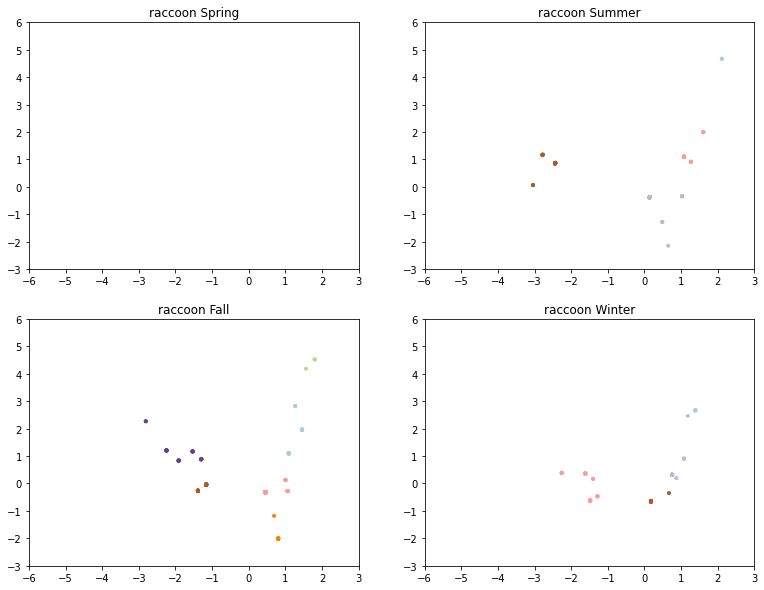

In [59]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-6,3)
c_ylim=(-3,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].set_title('raccoon Spring')
axs[0,1].scatter(r_summer_scaled[:,0],r_summer_scaled[:,1],c=r_summer_cluster.labels_,cmap='Paired',marker='.')
axs[0,1].set_title('raccoon Summer')
axs[1,0].scatter(r_fall_scaled[:,0],r_fall_scaled[:,1],c=r_fall_cluster.labels_,cmap='Paired',marker='.')
axs[1,0].set_title('raccoon Fall')
axs[1,1].scatter(r_winter_scaled[:,0],r_winter_scaled[:,1],c=r_winter_cluster.labels_,cmap='Paired',marker='.')
axs[1,1].set_title('raccoon Winter')




Text(0.5, 1.0, 'coyote, black bear, raccoon Winter')

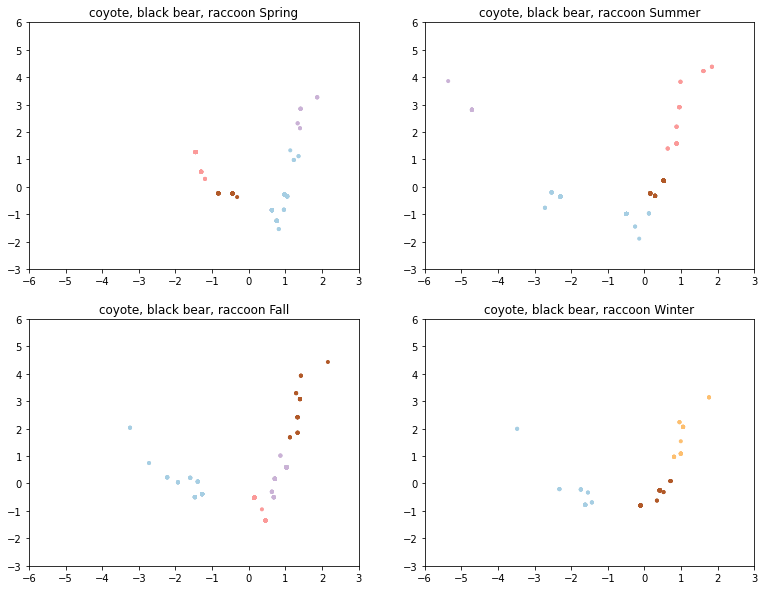

In [60]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-6,3)
c_ylim=(-3,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(cbr_spring_scaled[:,0],cbr_spring_scaled[:,1],c=cbr_spring_cluster.labels_,cmap='Paired',marker='.')
axs[0,0].set_title('coyote, black bear, raccoon Spring')
axs[0,1].scatter(cbr_summer_scaled[:,0],cbr_summer_scaled[:,1],c=cbr_summer_cluster.labels_,cmap='Paired',marker='.')
axs[0,1].set_title('coyote, black bear, raccoon Summer')
axs[1,0].scatter(cbr_fall_scaled[:,0],cbr_fall_scaled[:,1],c=cbr_fall_cluster.labels_,cmap='Paired',marker='.')
axs[1,0].set_title('coyote, black bear, raccoon Fall')
axs[1,1].scatter(cbr_winter_scaled[:,0],cbr_winter_scaled[:,1],c=cbr_winter_cluster.labels_,cmap='Paired',marker='.')
axs[1,1].set_title('coyote, black bear, raccoon Winter')

